# Classification de fleurs en fonction d'une image

Dans ce notebook, nous utiliserons le dataset de kaggle suivant : https://www.kaggle.com/alxmamaev/flowers-recognition \
Ce dossier comporte 5 types de fleur et nous allons construire un classifieur qui va permettre de prédire le type d'une nouvelle fleur en fonction de son image en pixel, la dimension (en pixel) qu'il faudra donner à cette fleur sera donné dans la suite de ce notebook.  \
Jérémy dufourmantelle

# Importation des librairies

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Extraction et mise en forme des données 

Ce dataset contient malheureusement des images de différentes catégories (tulipe,rose, etc..) et de différente taille. Cela necessite de devoir faire un tri sur les images afin de ne garder que celles qui sont le plus pertinente afin de maximiser les performances de notre modèle. \
Nous allons pour cela conserver les dimensions des images qui sont le plus représenté.

Chemin des 5 types d'images : rose, tulip, dandelion, daisy, sunflower. /!\ Nous considérons que le dossier des images se trouve à la racine du projet.

In [2]:
path_rose = "./flowers/rose/"
path_tulip = "./flowers/tulip/"
path_dandelion = "./flowers/dandelion/"
path_daisy = "./flowers/daisy/"
path_sunflower = "./flowers/sunflower/"

Définition des fonctions d'extraction des données

In [3]:
def get_images_from_dir(listSize,counter,directory):
    dirList = os.listdir(directory)
    for dir in dirList:
        if not os.path.isdir(dir) :
            path = directory + dir
            img = Image.open(path)
            if (img.size,img.mode) not in listSize:
                listSize.append((img.size,img.mode))
                counter[(img.size,img.mode)] = 1
            else:
                counter[(img.size,img.mode)] += 1
    return listSize,counter

def taille_majoritaire(directory):
    listSize = []
    counter = dict()
    listSize,counter = get_images_from_dir(listSize,counter,directory)
    max_value = max(counter.values())
    for key in counter.keys():
        if counter[key] == max_value:
            return (key,max_value)

In [4]:
roseKTM,roseMVTM = taille_majoritaire(path_rose)
tulipKTM,tulipMVTM = taille_majoritaire(path_tulip)     
dandelionKTM,dandelionMVTM = taille_majoritaire(path_dandelion)     
daisyKTM,daisyMVTM = taille_majoritaire(path_daisy)     
sunflowerKTM,sunflowerMVTM = taille_majoritaire(path_sunflower)     
        
print("Taille majoritaire pour la rose : ",roseKTM," avec ",roseMVTM," images")
print("Taille majoritaire pour la tulip : ",tulipKTM," avec ",tulipMVTM," images")
print("Taille majoritaire pour dandelion : ",dandelionKTM," avec ",dandelionMVTM," images")
print("Taille majoritaire pour daisy : ",daisyKTM," avec ",daisyMVTM," images")
print("Taille majoritaire pour sunflower : ",sunflowerKTM," avec ",sunflowerMVTM," images")
        
        
print("total : ")
listSize = []
counter = dict()
listSize,counter = get_images_from_dir(listSize,counter,path_rose)
listSize,counter = get_images_from_dir(listSize,counter,path_tulip)
listSize,counter = get_images_from_dir(listSize,counter,path_dandelion)
listSize,counter = get_images_from_dir(listSize,counter,path_daisy)
listSize,counter = get_images_from_dir(listSize,counter,path_sunflower)
max_value = max(counter.values())

for key in counter.keys():
    if counter[key] == max_value:
        print("Taille majoritaire globale du dataset : ",key," avec ",max_value," images")

Taille majoritaire pour la rose :  ((240, 159), 'RGB')  avec  132  images
Taille majoritaire pour la tulip :  ((500, 333), 'RGB')  avec  165  images
Taille majoritaire pour dandelion :  ((500, 333), 'RGB')  avec  187  images
Taille majoritaire pour daisy :  ((320, 240), 'RGB')  avec  106  images
Taille majoritaire pour sunflower :  ((320, 240), 'RGB')  avec  146  images
total : 
Taille majoritaire globale du dataset :  ((320, 240), 'RGB')  avec  604  images


In [5]:
listSizeRose = []
counterRose = dict()
listSizeRose,counterRose = get_images_from_dir(listSizeRose,counterRose,path_rose)
print("Il y a ",counterRose[((320, 240), 'RGB')]," images de rose")

listSizeTulip = []
counterTulip = dict()
listSizeTulip,counterTulip = get_images_from_dir(listSizeTulip,counterTulip,path_tulip)
print("Il y a ",counterTulip[((320, 240), 'RGB')]," images de tulip")

listSizeDandelion = []
counterDandelion = dict()
listSizeDandelion,counterDandelion = get_images_from_dir(listSizeDandelion,counterDandelion,path_dandelion)
print("Il y a ",counterDandelion[((320, 240), 'RGB')]," images de dandelion")

listSizeDaisy = []
counterDaisy = dict()
listSizeDaisy,counterDaisy = get_images_from_dir(listSizeDaisy,counterDaisy,path_daisy)
print("Il y a ",counterDaisy[((320, 240), 'RGB')]," images de daisy")

listSizeSunflower = []
counterSunflower = dict()
listSizeSunflower,counterSunflower = get_images_from_dir(listSizeSunflower,counterSunflower,path_sunflower)
print("Il y a ",counterSunflower[((320, 240), 'RGB')]," images de sunflower")

Il y a  93  images de rose
Il y a  117  images de tulip
Il y a  142  images de dandelion
Il y a  106  images de daisy
Il y a  146  images de sunflower


Nous allons donc extraire le min des résultats precedents de maniere a ce que chaque classe soit equitablement représenté, 
c'est a dire que nous allons extraire 93 images au hasard de taille 320*240 de chaque classe.

In [6]:
number_images_to_extract = 93

Exemple d'extraction des pixels d'une image

In [7]:
img = mpimg.imread('./flowers/daisy/5547758_eea9edfd54_n.jpg')
print(img.shape)

(232, 320, 3)


Définition d'une fonction d'extraction des images en utilisant matplotlib

In [8]:
def extract_images_from_dir(directory,nb_images,rule):
    images = []
    dirList = os.listdir(directory)
    for dir in dirList:
        if len(images) >= nb_images:
            return np.array(images,dtype=object)
        if not os.path.isdir(dir) :
            path = directory + dir
            img = Image.open(path)
            if (img.size,img.mode) == rule :
                images.append(mpimg.imread(path))

Extraction des images de chacune des classes en fonction d'une règle de trie

In [9]:
imagesRose = extract_images_from_dir(path_rose,number_images_to_extract,((320, 240), 'RGB'))
imagesTulip = extract_images_from_dir(path_tulip,number_images_to_extract,((320, 240), 'RGB'))
imagesDandelion = extract_images_from_dir(path_dandelion,number_images_to_extract,((320, 240), 'RGB'))
imagesDaisy = extract_images_from_dir(path_daisy,number_images_to_extract,((320, 240), 'RGB'))
imagesSunflower = extract_images_from_dir(path_sunflower,number_images_to_extract,((320, 240), 'RGB'))

# Construction du DataSet et des labels

Répartition des données pour les ensembles de test et de train

In [10]:
trainPart = 0.8
testPart = 1 - trainPart

Définition des valeurs numériques des classes 

In [11]:
imageValue = { 0 : "rose" , 1 : "tulip", 2 : "dandelion" , 3 : "daisy" , 4 : "sunflower" }
labelValue = {"rose" : 0,"tulip" : 1, "dandelion" : 2, "daisy" : 3, "sunflower" : 4}

Fonction de création du dataset

In [12]:
def create_DataSet():
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for i in range(int(trainPart*number_images_to_extract)-1):
        X_train.append(imagesRose[i])
        Y_train.append(labelValue["rose"])
        X_train.append(imagesTulip[i])
        Y_train.append(labelValue["tulip"])
        X_train.append(imagesDandelion[i])
        Y_train.append(labelValue["dandelion"])
        X_train.append(imagesDaisy[i])
        Y_train.append(labelValue["daisy"])
        X_train.append(imagesSunflower[i])
        Y_train.append(labelValue["sunflower"])
    for i in range(int(trainPart*number_images_to_extract)-1 , number_images_to_extract):
        X_test.append(imagesRose[i])
        Y_test.append(labelValue["rose"])
        X_test.append(imagesTulip[i])
        Y_test.append(labelValue["tulip"])
        X_test.append(imagesDandelion[i])
        Y_test.append(labelValue["dandelion"])
        X_test.append(imagesDaisy[i])
        Y_test.append(labelValue["daisy"])
        X_test.append(imagesSunflower[i])
        Y_test.append(labelValue["sunflower"])
    return np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)

Répartition des données

In [13]:
X_train,Y_train,X_test,Y_test = create_DataSet()

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(365, 240, 320, 3)
(365,)
(100, 240, 320, 3)
(100,)


Nous remarquons que ce dataSet final ne comporte pas énormément de données pour pouvoir faire un classifieur performant, néanmoins nous allons proposer une méthode qui permet d'avoir des performances corrects.

# Pre-processing sur les données du dataset

Cette étape permet de faire des opérations sur les données afin de pouvoir appliquer un modèle de Machine Learning dessus et pouvoir faire de l'apprentissage statistique.

La conversion d'un pixel RVB en nuance de gris est donnée par l'équation : gris = 0.299 R + 0.587 V + 0.114 B

In [15]:
def gray_convertion_pixel(pixel):
    return 0.299 * pixel[0] + 0.587 * pixel[1] + 0.114 * pixel[2]

Test sur un pixel :

In [16]:
pixel = X_train[0][0][0] # selectionne le premier pixel de la premiere image de l'ensemble d'entrainement

In [17]:
print("Code RVB de l 'image 0 :",pixel)
print("Traduction en nuance de gris de l'image 0 :",gray_convertion_pixel(pixel))

Code RVB de l 'image 0 : [195 210 169]
Traduction en nuance de gris de l'image 0 : 200.84099999999998


Fonction de binarisation d'un pixel

In [18]:
def binary_conversion_pixel(pixel):
    if (gray_convertion_pixel(pixel) / 255) > 0.5:
        return 1
    else :
        return 0

Exemple de binarisation d'un pixel

In [19]:
binary_interpretation = { 0 : "blanc" , 1 : "noir"}
print("Le pixel à été transformé en",binary_interpretation[binary_conversion_pixel(pixel)])

Le pixel à été transformé en noir


Fonction pour binariser toute une image

In [20]:
def image_binarisation(img):
    result = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i][j] = binary_conversion_pixel(img[i][j])
    return result

Affichage d'une image non binarisé et binarisé

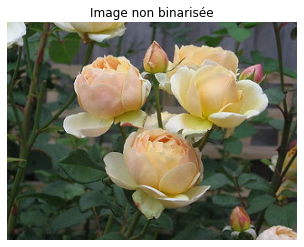

In [21]:
index = 0
img = X_train[index]
array = np.array(img, dtype=np.uint8)
image = Image.fromarray(array)
plt.axis("off")
plt.title(("Image non binarisée"))
plt.imshow(image)

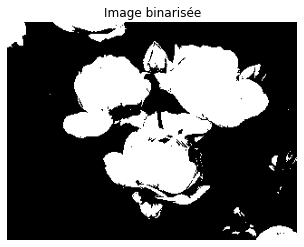

In [22]:
img = image_binarisation(X_train[0])
array = np.array(img, dtype=np.uint8)
image_binarised = Image.fromarray(array)
plt.axis("off")
plt.title("Image binarisée")
plt.imshow(image_binarised,cmap="gray")

Fonction pour binariser un ensemble d'images.

In [23]:
def images_set_binarisation(images):
    result = []
    for i in range(images.shape[0]):
        result.append(image_binarisation(images[i]))
    return np.array(result)

Vérification que les dimensions sur l'ensemble d'images restent corrects.

In [24]:
X_train_binarised = images_set_binarisation(X_train)

In [25]:
print(X_train.shape)
print(X_train_binarised.shape)

(365, 240, 320, 3)
(365, 240, 320)


# Application d'un classifieur Naif Bayésien par approche de loi de bernouilli

Nombre de paramètre : 240 * 320 * 5

Fonction de calculs des paramètres optimaux du modele

In [26]:
def calcul_parameters(X,Y):
    p_j = np.zeros((5,X.shape[1],X.shape[2]))
    for classe in range(5):
        filter_img = Y == classe
        img_classe = X[filter_img] # On selectionne uniquement les images de la classe
        for i in range (img_classe.shape[1]):
            for j in range(img_classe.shape[2]):
                for img in range(img_classe.shape[0]):
                    p_j[classe][i][j] += img_classe[img][i][j]
        p_j[classe] /= img_classe.shape[0]
    return p_j

In [27]:
p_j = calcul_parameters(X_train_binarised,Y_train)

Vérification de la dimension des parametres

In [28]:
print(p_j.shape)

(5, 240, 320)


In [29]:
def log_vraisemblance_img(img,p_j):
    eps = 1e-3
    values = np.zeros(5)
    for classe in range(5):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                values[classe] += np.log(p_j[classe][i][j] + eps) * img[i][j] + np.log(1 - p_j[classe][i][j] + eps)*(1 - img[i][j])
    return values

In [42]:
index = 1
values = log_vraisemblance_img(image_binarisation(X_train[index]),p_j)

Test du modèle pour une image

In [43]:
print("Le nom de l'image prédit par le modèle est :",imageValue[np.argmax(values)])
print("Le vrai nom de l'image est",imageValue[Y_train[index]])

Le nom de l'image prédit par le modèle est : tulip
Le vrai nom de l'image est tulip


**Attention** : calcul qui prend entre 5 et 10 min suivant la config

In [33]:
Y_train_hat = [np.argmax(log_vraisemblance_img(image_binarisation(X_train[i]), p_j)) for i in range (len(X_train))]

In [35]:
print("Taux de bonne classification sur l'ensemble d'entrainement: {} %".format(np.where(Y_train == Y_train_hat, 1, 0).mean()*100))

Taux de bonne classification sur l'ensemble d'entrainement: 47.397260273972606 %


Résultat obtenu : **47.397260273972606 %** \
Nous pouvons voir que pour un premier modèle reposant sur l'allumage des pixels d'une image, l'algorithme fait environ une erreur 1 fois sur 2 sur l'ensemble d'entrainement.

In [36]:
Y_test_hat = [np.argmax(log_vraisemblance_img(image_binarisation(X_test[i]), p_j)) for i in range (len(X_test))]

In [37]:
print("Taux de bonne classification sur l'ensemble de test: {} %".format(np.where(Y_test == Y_test_hat, 1, 0).mean()*100))

Taux de bonne classification sur l'ensemble de test: 33.0 %


Résultat obtenu : **33.0%** \
L'algorithme fait une erreur sur 3 dans la prédiction d'une image ou il y a 5 classes possibles

# Classifieur Naif Bayesien : approche par modélisation de loi normale

In [44]:
def image_gray_conversion(img):
    result = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i][j] = gray_convertion_pixel(img[i][j])
    return result

def images_set_gray_conversion(images):
    result = []
    for i in range(images.shape[0]):
        result.append(image_gray_conversion(images[i]))
    return np.array(result)

Affichage d'une image en nuance de gris et en mode RGB

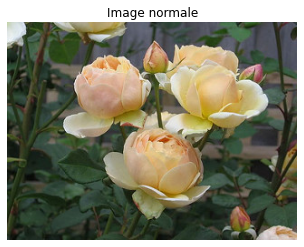

In [53]:
index = 0
img = X_train[index]
array = np.array(img, dtype=np.uint8)
image = Image.fromarray(array)
plt.axis("off")
plt.title(("Image normale"))
plt.imshow(image)

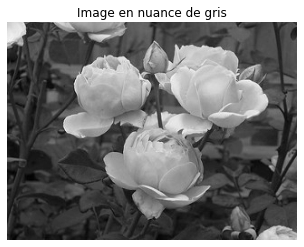

In [54]:
img = image_gray_conversion(X_train[0])
array = np.array(img, dtype=np.uint8)
image_binarised = Image.fromarray(array)
plt.axis("off")
plt.title("Image en nuance de gris")
plt.imshow(image_binarised,cmap="gray")

Conversion de l'ensemble d'entrainement en nuance de gris

In [55]:
print(image_gray_conversion(X_train[1]).shape)
X_train_gray_converted = images_set_gray_conversion(X_train)

(240, 320)


Dimension d'une image applatit en nuance de gris

In [58]:
print(X_train_gray_converted[0].flatten().shape)

(76800,)


In [59]:
def flatten_dataset(X):
    X_flatten = []
    for i in range(X.shape[0]):
        X_flatten.append(X[i].flatten())
    return np.array(X_flatten)

def learnML_parameters(X,Y):    
    mu = np.zeros((len(np.unique(Y)) , X.shape[1])) # definition du vecteur mu
    std = np.zeros((len(np.unique(Y)) , X.shape[1])) # definition du vecteur ecart type 
    
    for i in range(len(np.unique(Y))):
        mask = (Y == i)
        X_tmp = X[mask] # tri les images correspondant aux classes
        for j in range(X_tmp.shape[0]):
            for z in range(X_tmp.shape[1]):
                mu[i][z] += X_tmp[j][z]
        mu[i]/=X_tmp.shape[0] # application de 1 / n
            
    for i in range(len(np.unique(Y))): # Nombre de classe différentes
        mask = (Y == i)
        X_tmp = X[mask] # tri les images correspondant aux classes
        for j in range(X_tmp.shape[0]):
            for z in range(X_tmp.shape[1]):
                std[i][z] += (X_tmp[j][z] - mu[i][z])**2
        std[i]/=X_tmp.shape[0] # application de 1 / n
        
    
    return mu,np.sqrt(std) # retourne les moyennes et ecart types

In [60]:
# X_train_gray_converted /= X_train_gray_converted.max()
X_train_gray_converted_flatten = flatten_dataset(X_train_gray_converted)
mu,sig = learnML_parameters ( X_train_gray_converted_flatten, Y_train )

[72.69805479 75.09038356 78.74786301 ... 76.33658904 75.53935616
 76.75582192]
[106.9790137  106.70673973 109.53754795 ...  78.83653425  80.30947945
  81.25773973]
[80.18476712 79.27661644 78.45786301 ... 65.80250685 64.92541096
 63.88238356]
[71.43776712 72.0470137  74.60068493 ... 67.40473973 67.69630137
 67.09428767]
[142.93263014 143.35782192 144.77149315 ...  94.32268493  89.98117808
  92.37719178]


In [61]:
def log_likelihood(img, mu, sig, defsig = 1e-5):
    sig[sig==0]+=defsig
    return (-1/2) * np.sum( np.log(2 * np.pi * (sig**2)) + (((img - mu)**2)/(sig**2)))

def classify_image(img, mu, sig, defeps=1e-5):
    return np.argmax([log_likelihood(img, mu[i], sig[i],-1) for i in range(5)])

def classify_all_images(X, mu, sig, defeps=1e-5):
    Ypred = np.zeros((X.shape[0]))
    for i in range(X.shape[0]):
        Ypred[i] = classify_image(X[i], mu, sig, -1)
    return Ypred

In [62]:
Y_train_hat = classify_all_images(X_train_gray_converted_flatten, mu, sig, -1)

In [65]:
print("Taux de bonne classification sur l'ensemble d'entrainement: {} %".format(np.where(Y_train == Y_train_hat, 1, 0).mean() * 100))

Taux de bonne classification sur l'ensemble d'entrainement: 45.20547945205479 %


Précision du modèle sur l'ensemble d'entrainement : **45.20547945205479 %**

In [66]:
Y_test_hat = classify_all_images(flatten_dataset(images_set_gray_conversion(X_test)), mu, sig, -1)

In [67]:
print("Taux de bonne classification sur l'ensemble de test: {} %".format(np.where(Y_test == Y_test_hat, 1, 0).mean() * 100))

Taux de bonne classification sur l'ensemble de test: 35.0 %


Précision du modèle sur l'ensemble de test: **35.0 %**

# Classifieur KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
X_train_gray_converted= images_set_gray_conversion(X_train)
X_train_gray_converted_flatten = flatten_dataset(X_train_gray_converted)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train_gray_converted_flatten, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [89]:
print("Taux de bonne classification sur l'ensemble d'entrainement :",neigh.score(X_train_gray_converted_flatten,Y_train)*100,"%")


Taux de bonne classification sur l'ensemble d'entrainement : 48.49315068493151 %


In [90]:
print("Taux de bonne classification sur l'ensemble de test :",neigh.score(flatten_dataset(images_set_gray_conversion(X_test)),Y_test)*100,"%")

Taux de bonne classification sur l'ensemble de test : 25.0 %


# Classifieur par Support Vector Machine

In [74]:
from sklearn import svm

In [75]:
clf = svm.SVC()
clf.fit(X_train_gray_converted_flatten, Y_train)

In [76]:
classif_ratio = clf.score(X_train_gray_converted_flatten,Y_train)*100
print("Taux de bonne classification sur l'ensemble d'entrainement : ",classif_ratio,"%")

Taux de bonne classification sur l'ensemble d'entrainement :  86.3013698630137 %


Précision du modèle SVM sur l'ensemble d'entrainement : **86.3013698630137 %**

In [77]:
X_test_gray_converted= images_set_gray_conversion(X_test)
X_test_gray_converted_flatten = flatten_dataset(X_test_gray_converted)
classif_ratio = clf.score(X_test_gray_converted_flatten,Y_test)*100
print("Taux de bonne classification sur l'ensemble de test : ",classif_ratio,"%")

Taux de bonne classification sur l'ensemble de test :  42.0 %


Précision du modèle SVM sur l'ensemble de test : **42.0 %**

Le modèle le plus adapté en terme de précision est celui basé sur les SVM.